In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter
df = pd.read_csv('merged_recipes_reviews.csv')
negative_reviews = df[df['rating'] < 5].copy()

In [74]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()
negative_reviews['cleaned_text'] = negative_reviews['text'].apply(clean_text)

In [75]:
english_stopwords = [
    'the', 'a', 'an', 'this', 'that', 'these', 'those',

    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves',
    'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves',
    'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself',
    'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',

    'at', 'by', 'for', 'from', 'in', 'of', 'on', 'to', 'with', 'as', 'into',
    'like', 'through', 'after', 'over', 'between', 'out', 'against', 'during',
    'without', 'before', 'after', 'above', 'below', 'up', 'down', 'off', 'on',
    'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where',
    'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other',
    'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than',
    'too', 'very', 'can', 'will', 'just', 'should', 'now',

    'and', 'but', 'or', 'yet', 'so', 'for', 'nor', 'although', 'because', 'since',
    'unless', 'until', 'while', 'whereas', 'though', 'even', 'if', 'whether',

    'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
    'having', 'do', 'does', 'did', 'doing', 'would', 'could', 'should', 'might',
    'must', 'may', 'shall', 'can', 'will', 'next', 'don', 'didn',

    'also', 'back', 'get', 'just', 'now', 'one', 'really', 'say', 'see', 'well',
    'what', 'when', 'where', 'which', 'who', 'whom', 'why', 'how',

    'recipe', 'make', 'made', 'making', 'use', 'used', 'using', 'add', 'added',
    'adding', 'cup', 'cups', 'tsp', 'tbsp', 'teaspoon', 'tablespoon', 'ounce',
    'ounces', 'pound', 'pounds', 'gram', 'grams', 'inch', 'inches', 'piece',
    'pieces', 'slice', 'slices', 'clove', 'cloves', 'pinch', 'dash',

    'good', 'bad', 'big', 'small', 'large', 'great', 'nice', 'fine', 'ok', 'okay',
    'pretty', 'beautiful', 'ugly', 'new', 'old', 'much', 'many',
    'young', 'fresh', 'different', 'same', 'similar', 'other', 'another',
    'important', 'interesting', 'funny', 'strange', 'weird', 'normal', 'usual',

    'very', 'really', 'quite', 'rather', 'pretty', 'too', 'so', 'just', 'only',
    'even', 'almost', 'enough', 'hardly', 'simply', 'absolutely', 'completely',
    'totally', 'utterly', 'highly', 'deeply',

    'what', 'which', 'who', 'whom', 'whose', 'where', 'when', 'why', 'how',

    'actually', 'basically', 'literally', 'honestly', 'frankly', 'seriously',
    'maybe', 'perhaps', 'possibly', 'probably', 'likely', 'unlikely',
    'almost', 'nearly', 'about', 'around', 'approximately', 'exactly',
    'certainly', 'definitely', 'surely', 'obviously', 'clearly', 'apparently',
    'fortunately', 'unfortunately', 'luckily', 'unluckily', 'hopefully',
    'thankfully', 'sadly', 'happily', 'finally', 'eventually', 'gradually',
    'slowly', 'quickly', 'rapidly', 'suddenly', 'immediately', 'instantly',
    'always', 'never', 'often', 'sometimes', 'usually', 'rarely', 'seldom',
    'frequently', 'occasionally', 'regularly', 'constantly', 'continuously', 'first', 'second', 'third'
]

def get_common_words(texts, top_n = 20):
    all_words = []
    for text in texts:
        words = text.split()
        filtered_words = [word for word in words if word not in english_stopwords and len(word) > 2]
        all_words.extend(filtered_words)

    word_counts = Counter(all_words)
    return word_counts.most_common(top_n)

common_words = get_common_words(negative_reviews['cleaned_text'])
print("Самые частые слова в негативных отзывах:")
for word, count in common_words:
    print(f"{word}: {count}")


Самые частые слова в негативных отзывах:
sauce: 2022
time: 1892
chicken: 1884
flavor: 1243
little: 1234
garlic: 1175
minutes: 1072
instead: 1061
cheese: 977
oil: 914
taste: 894
salt: 878
bit: 877
pepper: 845
half: 826
think: 804
cooked: 772
easy: 767
butter: 751
better: 727


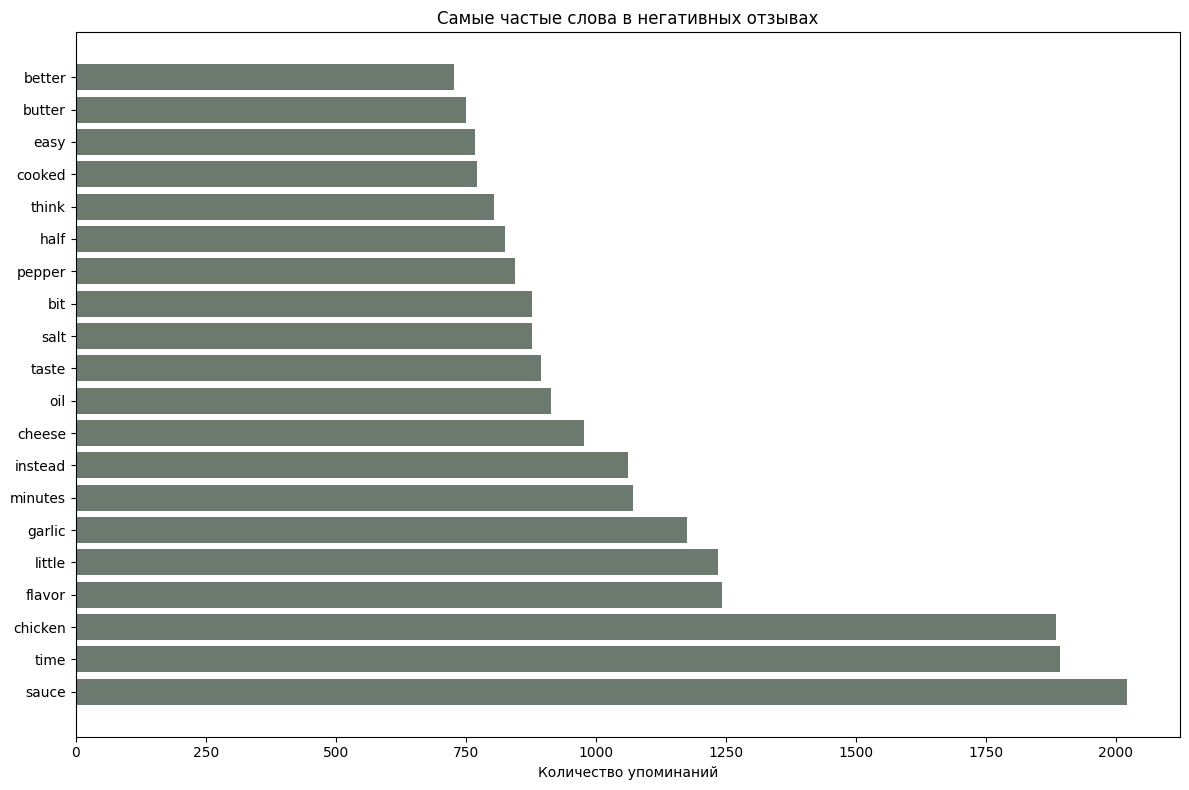

In [76]:
words, counts = zip(*common_words)
plt.figure(figsize=(12, 8))
plt.barh(words, counts, color = '#6c796f')
plt.title('Самые частые слова в негативных отзывах')
plt.xlabel('Количество упоминаний')
plt.tight_layout()
plt.show()

Три группы возможных проблем в рецептах: проблемы со временем, проблемы с инградиентами, проблемы в пропорциями/вкусом

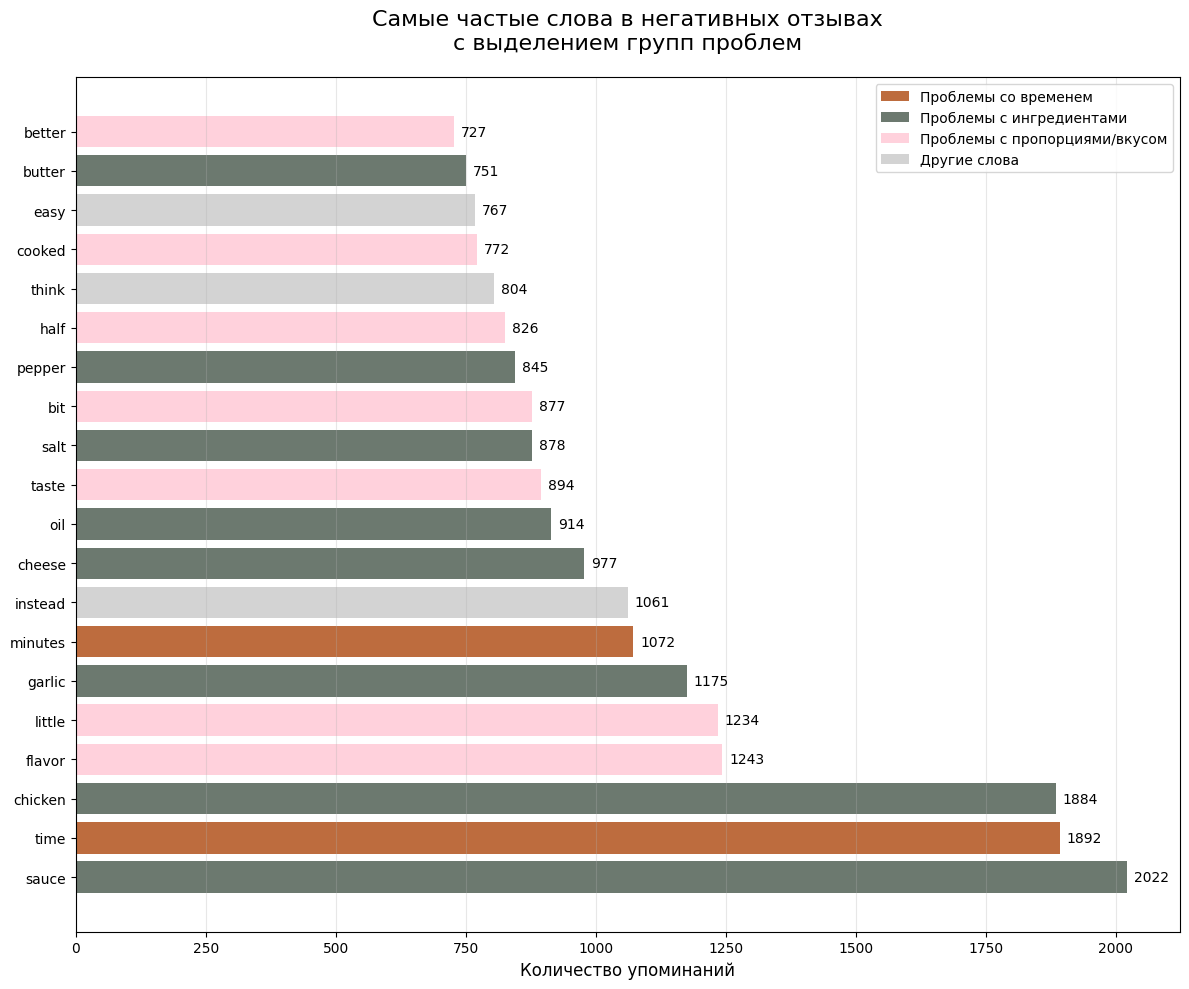

In [80]:
from matplotlib.patches import Patch
time_problems = ['time', 'minutes']
ingredient_problems = ['sauce', 'chicken', 'garlic', 'cheese', 'oil', 'salt', 'pepper', 'butter']
proportion_taste_problems = ['flavor', 'taste', 'little', 'bit', 'half', 'cooked', 'better']

colors_palette = {
    'time': '#bd6c3e',
    'ingredients': '#6c796f',
    'proportions': '#ffd1dc',
    'other': '#d3d3d3'
}
colors = []

for word in words:
    if word in time_problems:
        colors.append(colors_palette['time'])
    elif word in ingredient_problems:
        colors.append(colors_palette['ingredients'])
    elif word in proportion_taste_problems:
        colors.append(colors_palette['proportions'])
    else:
        colors.append(colors_palette['other'])

plt.figure(figsize=(12, 10))
bars = plt.barh(words, counts, color=colors)

plt.title('Самые частые слова в негативных отзывах\nс выделением групп проблем', fontsize=16, pad=20)
plt.xlabel('Количество упоминаний', fontsize=12)

legend_elements = [
    Patch(facecolor='#bd6c3e', label='Проблемы со временем'),
    Patch(facecolor='#6c796f', label='Проблемы с ингредиентами'),
    Patch(facecolor='#ffd1dc', label='Проблемы с пропорциями/вкусом'),
    Patch(facecolor='#d3d3d3', label='Другие слова')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.bar_label(bars, labels=counts, padding=5, fontsize=10)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

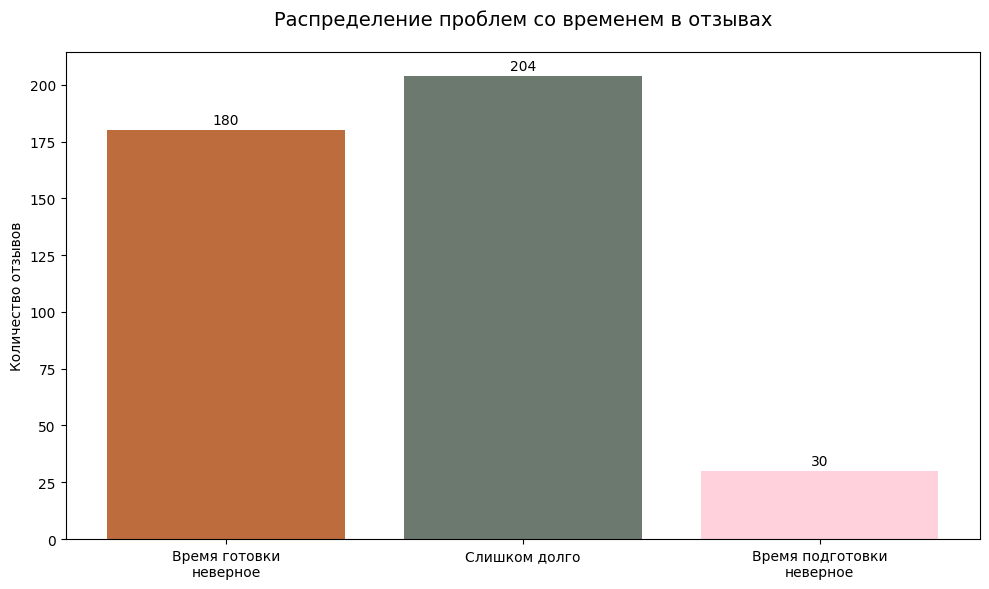

In [99]:
time_patterns = {
    'Время готовки\nневерное': r'(cook.*time.*(wrong|more|less|longer)|(wrong|more|less|longer).*cook.*time)',
    'Слишком долго': r'time.*consuming|took.*long|too.*long',
    'Время подготовки\nневерное': r'(prep.*time.*(more|wrong|underestimat)|(more|wrong|underestimat).*prep.*time)'
}

issues = []
counts = []

for issue, pattern in time_patterns.items():
    matches = []
    for text in negative_reviews['cleaned_text']:
        if re.search(pattern, text):
            matches.append(text)
    issues.append(issue)
    counts.append(len(matches))

plt.figure(figsize=(10, 6))
bars = plt.bar(issues, counts, color=['#bd6c3e', '#6c796f', '#ffd1dc'])

plt.bar_label(bars, labels=counts, padding=2, fontsize=10)
plt.title('Распределение проблем со временем в отзывах', fontsize=14, pad=20)
plt.ylabel('Количество отзывов')
plt.tight_layout()
plt.show()

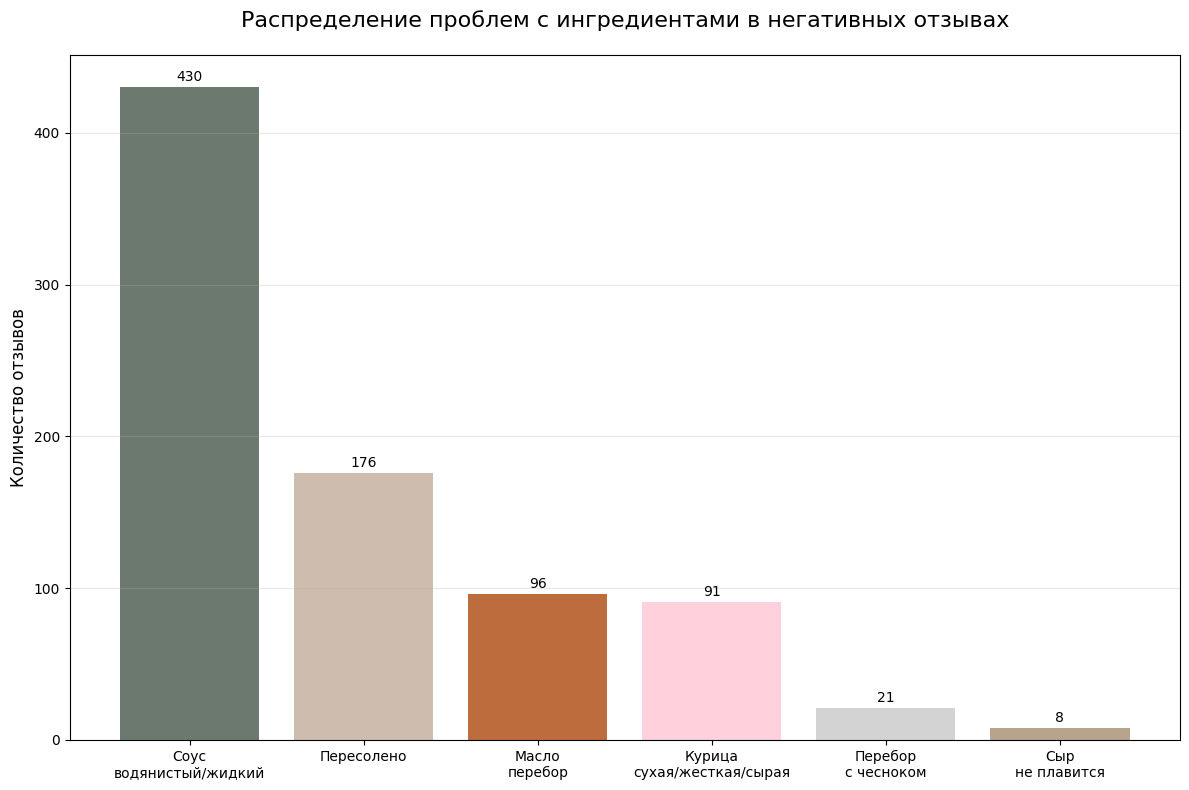

In [103]:
ingredient_problems = {
    'Курица\nсухая/жесткая/сырая': [
        r'(dry.*chicken)|(chicken.*dry)',
        r'(tough.*chicken)|(chicken.*tough)',
        r'(overcook.*chicken)|(chicken.*overcook)',
        r'(rubbery.*chicken)|(chicken.*rubbery)',
        r'(raw.*chicken)|(chicken.*raw)',
        r'(undercook.*chicken)|(chicken.*undercook)'
    ],
    'Соус\nводянистый/жидкий': [
        r'sauce.*watery', r'sauce.*runny', r'sauce.*thin',
        r'watery.*sauce', r'runny.*sauce', r'thin.*sauce'
    ],
    'Перебор\nс чесноком': [
        r'too much garlic', r'garlic.*too much', r'much garlic',
        r'garlic.*overpower', r'garlic.*strong', r'strong.*garlic'
    ],
    'Сыр\nне плавится': [
        r'cheese.*rubbery', r'cheese.*not melt', r'rubbery.*cheese',
        r'cheese.*didn t melt', r'cheese.*hard'
    ],
    'Пересолено': [
        r'too much salt', r'oversalted',
        r'excess salt', r'salty', r'overly salty'
    ],
    'Масло\nперебор': [
        r'too much oil', r'oily', r'greasy',
        r'excess oil', r'oil.*too much'
    ]
}

issues = []
counts = []

for issue, patterns in ingredient_problems.items():
    matches = []
    for text in negative_reviews['cleaned_text']:
        for pattern in patterns:
            if re.search(pattern, text):
                matches.append(text)
                break
    issues.append(issue)
    counts.append(len(matches))

sorted_data = sorted(zip(issues, counts), key=lambda x: x[1], reverse=True)
issues_sorted, counts_sorted = zip(*sorted_data)

plt.figure(figsize=(12, 8))
bars = plt.bar(issues_sorted, counts_sorted,
               color=['#6c796f', '#cebdae', '#bd6c3e', '#ffd1dc', '#d3d3d3', '#b8a38d'])

plt.bar_label(bars, labels=counts_sorted, padding=2, fontsize=10)
plt.title('Распределение проблем с ингредиентами в негативных отзывах', fontsize=16, pad=20)
plt.ylabel('Количество отзывов', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

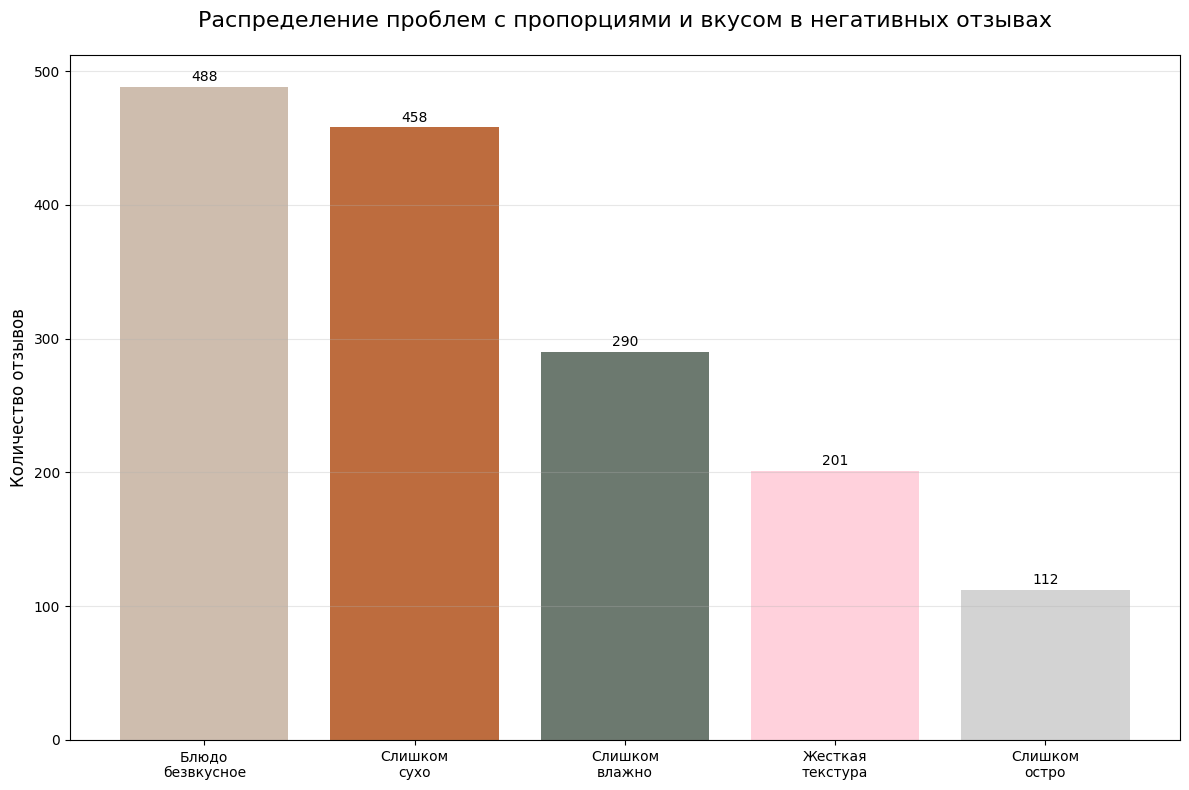

In [101]:
taste_problems = {
    'Блюдо\nбезвкусное': [
        r'bland', r'tasteless', r'no flavor', r'lack of flavor',
        r'flavorless', r'unseasoned', r'dull'
    ],
    'Слишком\nсухо': [
        r'too dry', r'dry', r'overcooked', r'over cooked',
        r'cooked too long', r'dried out'
    ],
    'Слишком\nвлажно': [
        r'too wet', r'wet', r'undercooked', r'under cooked',
        r'soggy', r'mushy', r'watery'
    ],
    'Жесткая\nтекстура': [
        r'tough', r'rubbery', r'chewy', r'hard', r'gummy'
    ],
    'Слишком\nостро': [
        r'too spicy', r'too hot', r'too much spice',
        r'overly spicy', r'burning'
    ]
}

issues = []
counts = []

for issue, patterns in taste_problems.items():
    matches = []
    for text in negative_reviews['cleaned_text']:
        for pattern in patterns:
            if re.search(pattern, text):
                matches.append(text)
                break
    issues.append(issue)
    counts.append(len(matches))

sorted_data = sorted(zip(issues, counts), key=lambda x: x[1], reverse=True)
issues_sorted, counts_sorted = zip(*sorted_data)

plt.figure(figsize=(12, 8))
bars = plt.bar(issues_sorted, counts_sorted,
               color=['#cebdae', '#bd6c3e', '#6c796f', '#ffd1dc', '#d3d3d3', '#b8a38d'])

plt.bar_label(bars, labels=counts_sorted, padding=2, fontsize=10)
plt.title('Распределение проблем с пропорциями и вкусом в негативных отзывах', fontsize=16, pad=20)
plt.ylabel('Количество отзывов', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()